In [ ]:
# @title
from IPython.display import display, HTML

display(HTML('''
<div style="display: flex; justify-content: center; align-items: center; text-align: center;">
    <img alt="udeA logo" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width: 107px; height: 152px; margin-right: 20px;">
    <div>
        <h2 style="font-size: 28px;"><strong>Práctica #6 : Diseño de filtros digitales</strong></h2>
        <p>Sergio Daza Vasquez - 1010082612</p>
        <p>Natalia Arenas Pachón - 1007729698</p>
        <p>Daniel Barrera Mazo - 1045439175</p>
    </div>
</div>
'''))

### **Librerías**

In [1]:
# Librerias a usar a lo largo de la practica
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

## <center> **PROCEDIMIENTO**

## **4.1 Creación de la señal**

Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0 ≤ 𝑛 ≤ 1000 , 𝐹0 = 0,01𝐻𝑧 y 𝐹𝑠 =25 𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso
electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

$$
Y_e(n) = \alpha x_e(n - D) + w(n)
$$

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los
diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de
adquisición.

* Genere las secuencias ficticias 𝑥𝑒(𝑛) y 𝑦𝑒(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza $\sigma^2 = 0.01$, establezca $\alpha = 0.8$ y un retraso $\text{D} = 15$ muestras. Grafique ambas señales.

Nota: Para generar el ruido gaussiano use la función de *numpy:np.random.normal.*

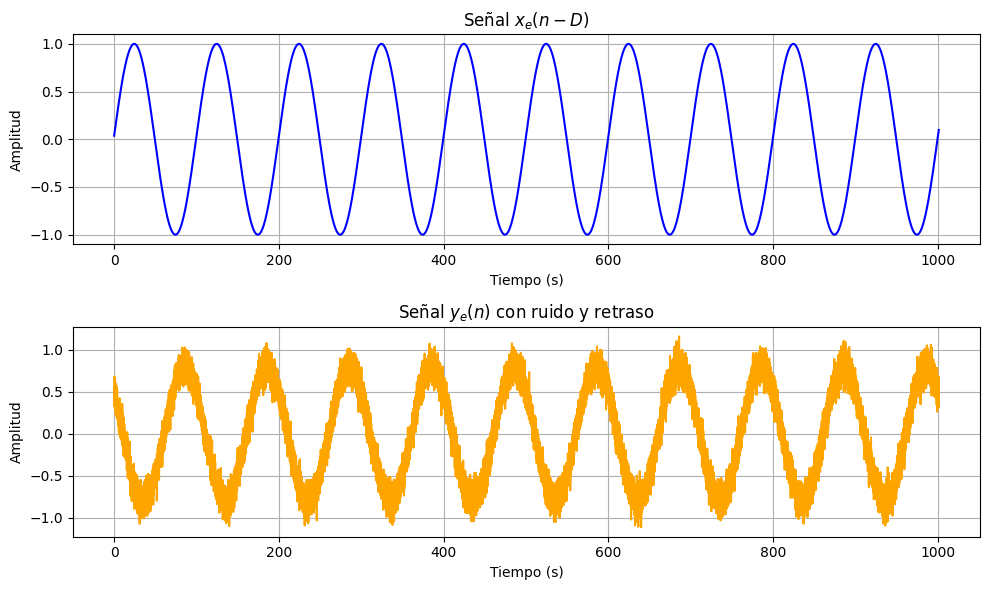

In [2]:
# creación de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+D/Fs)) #potencial con con retraso
x_e2 = np.sin(2*np.pi*F0*(n+D/Fs)+D) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e2 + w # señal adquirida con ruido y retraso.

# Visualización de las señales
plt.figure(figsize=(10, 6))

# Gráfica de x_e
plt.subplot(2, 1, 1)
plt.plot(n, x_e, color='blue', label='$x_e(n-D)$')
plt.title('Señal $x_e(n-D)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

# Gráfica de y_e
plt.subplot(2, 1, 2)
plt.plot(n, y_e, color='orange', label='$y_e(n)$')
plt.title('Señal $y_e(n)$ con ruido y retraso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()

## **4.2 Diseño de un filtro**

La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde  los principales argumentos de entrada son N: Orden del filtro y 𝑊𝑛: Frecuencia de corte.  

Para filtros digitales 𝑊𝑛 está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist  que es igual a la mitad de la frecuencia de muestreo de la señal. 𝑊𝑛 es igual a la frecuencia  de corte del filtro dividido la frecuencia de Nyquist.  

* Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.  

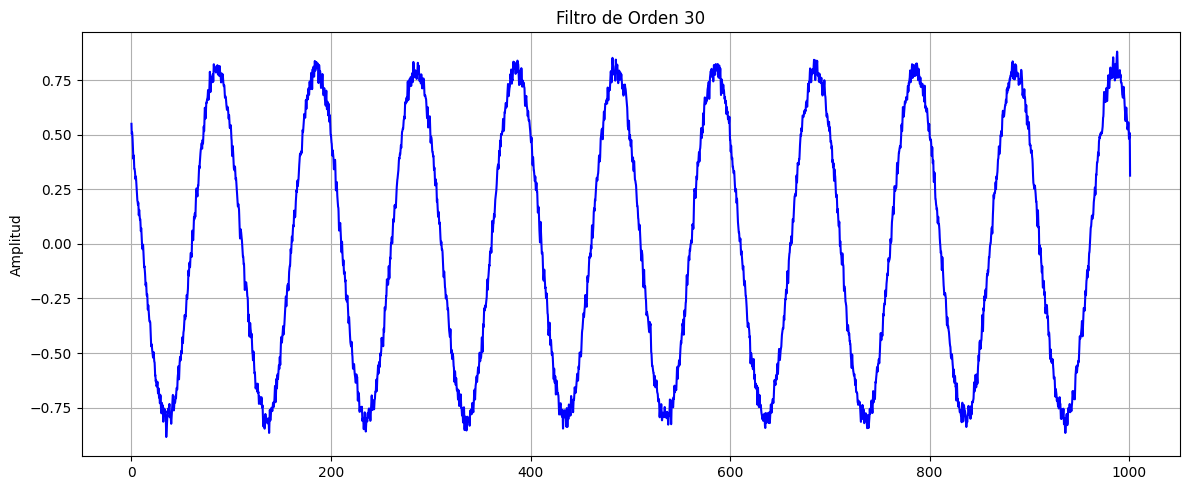

In [3]:
# Parámetros de filtro
order = 30  #Orden
nyquist = Fs/2  # Frecuencia de Nyquist
wn_low = 1.25/nyquist  # Frecuencia de corte normalizada respecto a Nyquist

lowpass_30 = signal.firwin(order + 1, wn_low, pass_zero='lowpass', window='hamming')  # Filtro de orden 30

y_f_30 = signal.filtfilt(b=lowpass_30,a=1,x=y_e)  # Aplicación del filtro de orden 30

plt.figure(figsize=(12,5))
plt.plot(n, y_f_30, color='blue')
plt.title("Filtro de Orden 30")
plt.ylabel("Amplitud")
plt.grid()


plt.tight_layout()
plt.show()

* ¿Qué cambios hay en los argumentos de la función para implementar un filtro
pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5
muestras/s.

Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)

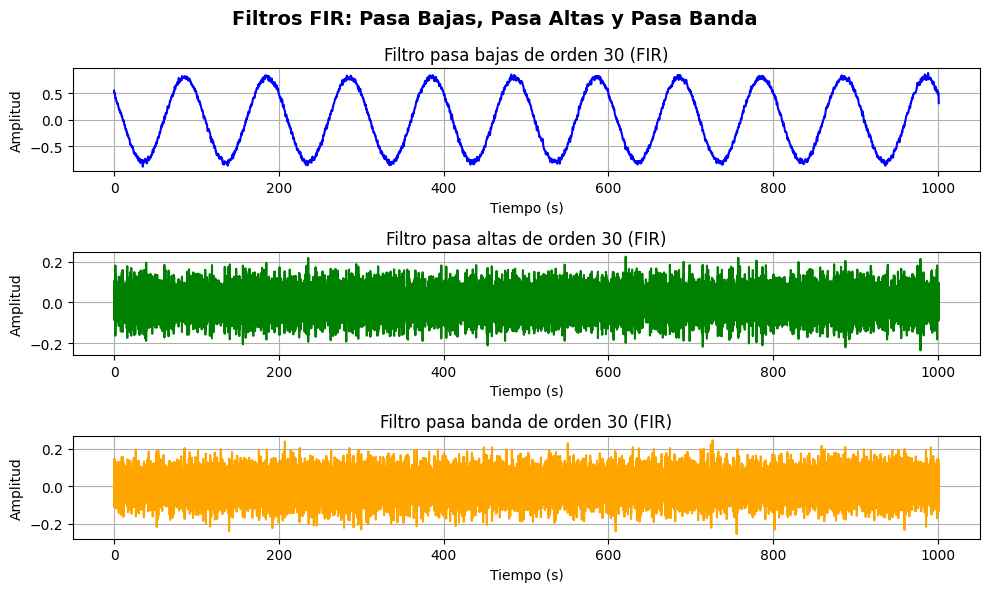

In [4]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_high = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist

# Pasa bajas
lowpass = signal.firwin(order+1,wn_low, pass_zero = 'lowpass',window='hamming') #filtro
y_f_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro

# Pasa altas
highpass = signal.firwin(order+1, wn_high, pass_zero='highpass', window='hamming') # filtro pasa altas
y_f_high_30 = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicación del filtro

# Diseño del filtro pasa banda
bandpass=signal.firwin(order+1,[wn_low,wn_high],pass_zero='bandpass',window='hamming')
y_f_band_30 = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicación del filtro

# Visualización de las señales filtradas
plt.figure(figsize=(10, 6))
plt.suptitle("Filtros FIR: Pasa Bajas, Pasa Altas y Pasa Banda", fontsize=14,fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_f_30, color='blue')
plt.title("Filtro pasa bajas de orden 30 (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_high_30, color='green')
plt.title("Filtro pasa altas de orden 30 (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_band_30, color='orange')
plt.title("Filtro pasa banda de orden 30 (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

En la gráfica obtenida se puede observar el resultado de las tres señales filtradas con distintos tipos de filtros FIR. En la primera grafica(azul), se evidencia el filtro pasa bajas de orden 30 que atenúa las componentes de frecuencia más altas de la señal, permitiendo que sólo las frecuencias bajas se mantengan, lo cual genera una señal más suave y menos ruidosa. En la segunda grafica(verde), representa el filtro pasa altas, el cual elimina las bajas frecuencias, lo que resulta en una señal de mayor variabilidad y apariencia de ruido, debido a que se mantienen los componentes de alta frecuencia. Finalmente, en la tercera grafica(naranja), el filtro pasa banda permite solo las frecuencias en el rango definido (entre 1.25 y 7.5 Hz) y atenúa el resto, generando una señal que presenta características intermedias entre las obtenidas en los filtros pasa bajas y pasa altas, pero de igual manera que el pasa altas, en este rango se evidencia variavilidad y apariencia de ruido.

La función iirfilter permite diseñar un filtro IIR.  

* Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

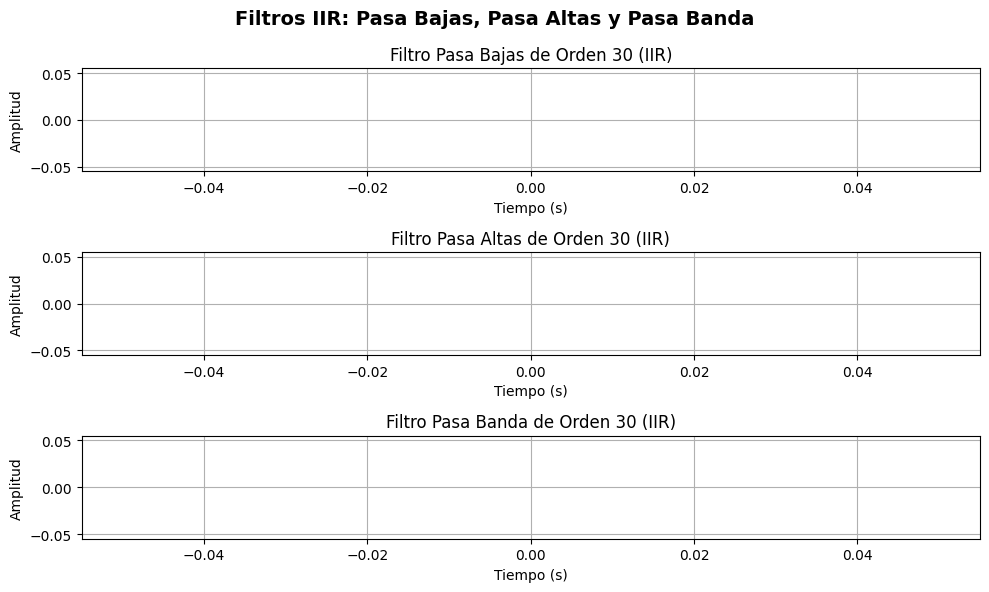

In [5]:
# Filtro pasa bajas
b_low, a_low = signal.iirfilter(order, wn_low, btype='lowpass')
y_f_low = signal.filtfilt(b=b_low,a=a_low,x=y_e)  # Aplicación del filtro

# Filtro pasa altas
b_high, a_high = signal.iirfilter(order, wn_high, btype='highpass')
y_f_high = signal.filtfilt(b=b_high,a=a_low,x=y_e)  # Aplicación del filtro

# Diseño del filtro pasa banda
b_band, a_band = signal.iirfilter(order, [wn_low,wn_high], btype='bandpass')
y_f_band = signal.filtfilt(b=b_band,a=a_low,x=y_e)  # Aplicación del filtro

# Visualización de las señales
plt.figure(figsize=(10, 6))
plt.suptitle("Filtros IIR: Pasa Bajas, Pasa Altas y Pasa Banda", fontsize=14,fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_f_low, color='blue')
plt.title("Filtro Pasa Bajas de Orden 30 (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_high, color='green')
plt.title("Filtro Pasa Altas de Orden 30 (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_band, color='orange')
plt.title("Filtro Pasa Banda de Orden 30 (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

En la gráfica se evidencian los resultados de aplicar filtros IIR de orden 30 en configuraciones de pasa bajas, pasa altas y pasa banda, en condiciones similares a las de los filtros FIR. Se observa que el filtro tomo un comportamiento inestable y complejo al no dejar pasar ninguna frecuencia, esto se debe a que en los filtros IIR se debe usar un orden menor respecto al FIR, para obtener las caracteristicas deseadas del filtro. En los IIR un orden inadecuado puede generar inestabilidad y por ende desvordamiento, por esta razón y con fin de realizar un analisis más adecuado se establece un orden mucho menor acontinuación para el IRR.

Filtro IIR con un orden menor

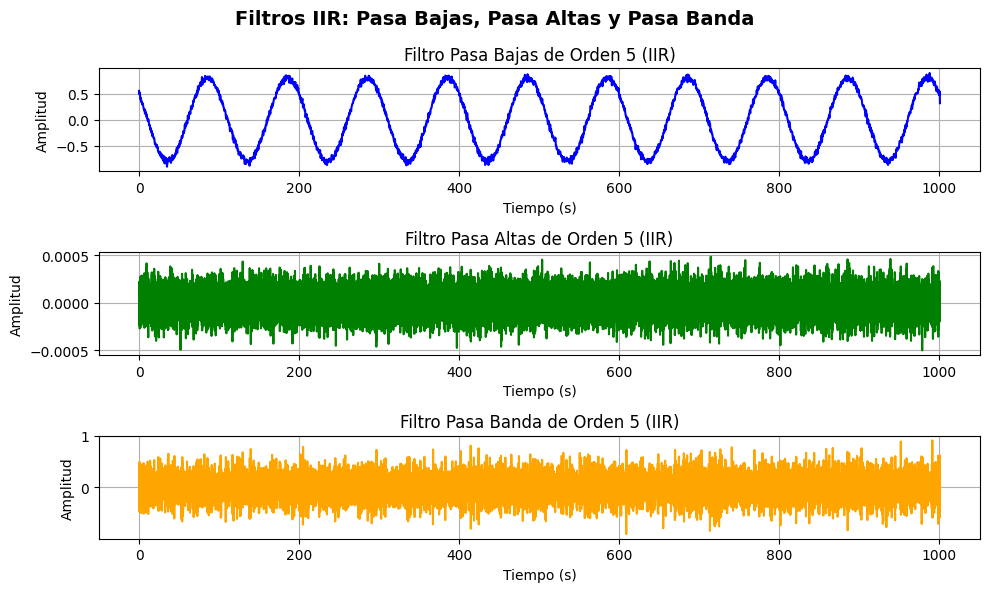

In [6]:
orden_iir = 5

# Filtro pasa bajas
b_low, a_low = signal.iirfilter(orden_iir, wn_low, btype='lowpass')
y_f_low = signal.filtfilt(b=b_low,a=a_low,x=y_e)  # Aplicación del filtro

# Filtro pasa altas
b_high, a_high = signal.iirfilter(orden_iir, wn_high, btype='highpass')
y_f_high = signal.filtfilt(b=b_high,a=a_low,x=y_e)  # Aplicación del filtro

# Diseño del filtro pasa banda
b_band, a_band = signal.iirfilter(orden_iir, [wn_low,wn_high], btype='bandpass')
y_f_band = signal.filtfilt(b=b_band,a=a_low,x=y_e)  # Aplicación del filtro

# Visualización de las señales
plt.figure(figsize=(10, 6))
plt.suptitle("Filtros IIR: Pasa Bajas, Pasa Altas y Pasa Banda", fontsize=14,fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_f_low, color='blue')
plt.title("Filtro Pasa Bajas de Orden 5 (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_high, color='green')
plt.title("Filtro Pasa Altas de Orden 5 (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_band, color='orange')
plt.title("Filtro Pasa Banda de Orden 5 (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

En la gráfica podemos denotar que los resultados de aplicar filtros IIR de orden 5 en configuraciones de pasa bajas, pasa altas y pasa banda, en condiciones similares a las de los filtros FIR que se evidenciaron en la grafica anterior. Comparando ambos tipos de filtros, se observa que el filtro IIR pasa bajas (azul) logra una señal suavizada similar a la obtenida con el filtro FIR. En el caso del filtro pasa altas (verde) y pasa banda (naranja), las señales filtradas también presentan una mayor intensidad en la variabilidad ademsa de , valores mas pequeños en la escala de amplitud, esto se debe a que los IIR tienden a una mayor distorsión y amplitud diferente en las fluctuaciones en comparación con los FIR, segun el orden seleccionado. Eso se debe a que, los filtros IIR son más eficientes computacionalmente que los FIR, pero pueden introducir una mayor distorsión en la señal.

La siguiente función permite visulizar la respuesta en frecuencia de un filtro dado, lo cual permite corroborar el comportamietno del filtro diseñado

In [7]:
def mfreqz(b,a,order,nyq_rate = 1):
        # Donde
        #b: numerador de la tf
        #a:denominador de la tf
        #order: orden del filtro
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

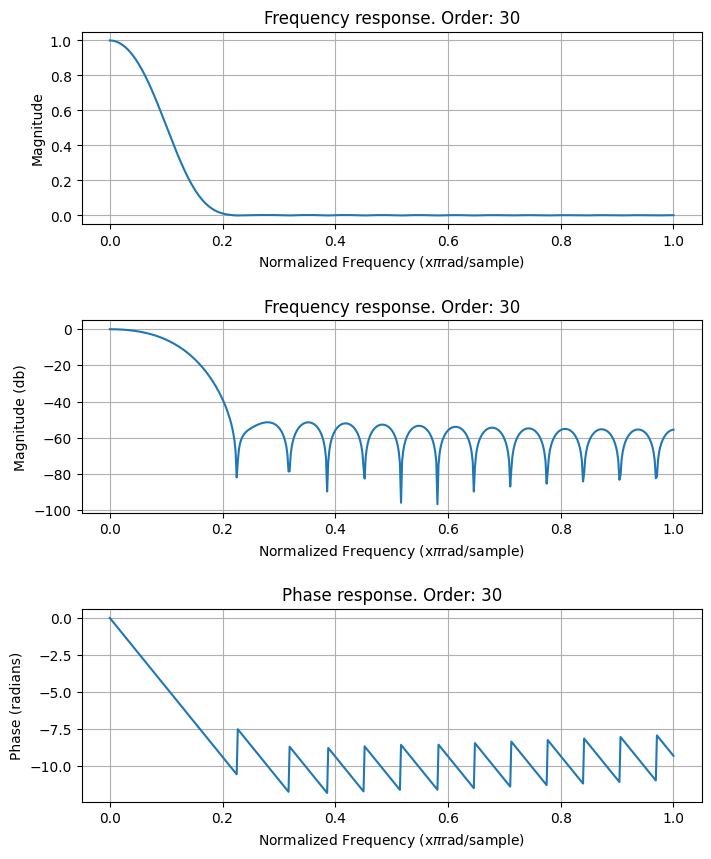

In [8]:
#@title Filtro pasa bajas
mfreqz(b=lowpass,a=1,order=order)

En la magintud se evidencia la banda de corte de las frecuencias, se establece de este modo que este tipo e filtro permite el paso de las frecuencias bajas, esto se refuerza en la magnitud de db, en donde es mas claro como se atenuan las altas frecuencias.

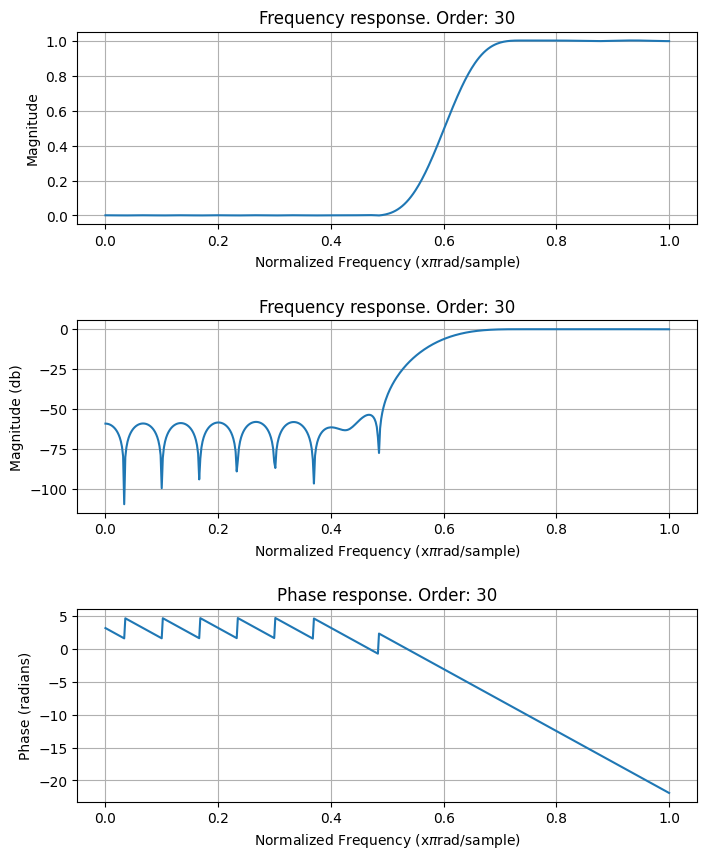

In [9]:
#@title Filtro pasa altas
mfreqz(b=highpass,a=1,order=order)

Por otro lado para el pasa altas, en la magintud se evidencia la banda de corte de las frecuencias, en donde se evidencia que este tipo e filtro permite el paso de las frecuencias altas, lo cual se refuerza en la grafica de magnitud en db, que permite observar como las bajas frecuencias se atenuan respecto a las altas frecuencias.

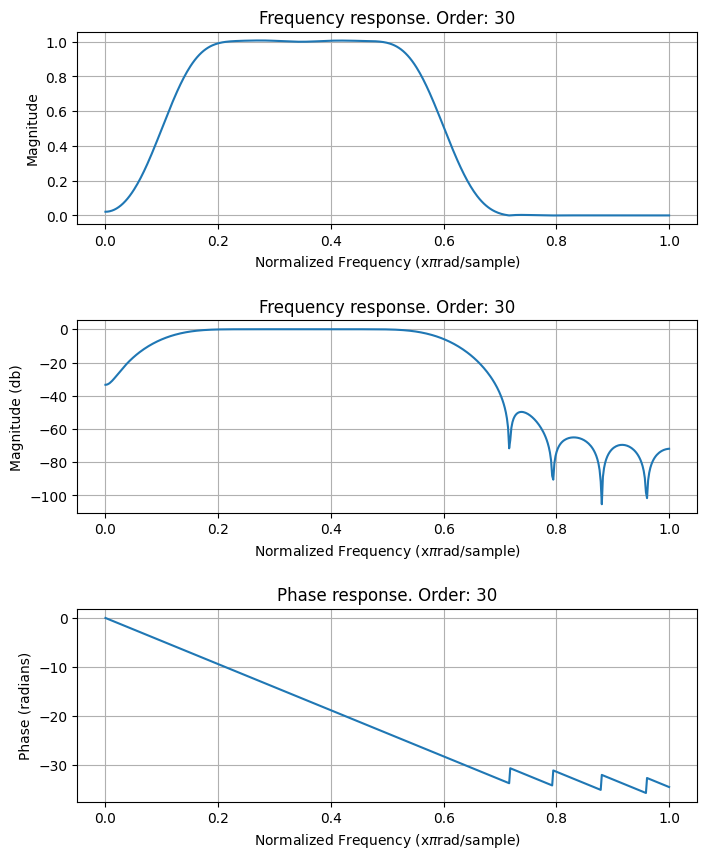

In [10]:
#@title Filtro pasa banda
mfreqz(b=bandpass,a=1,order=order)

Finalmete el pasabandas ayuda a evidenciar como permite el paso de un rango de frecuencias establecido.

## **4.3 Filtrado**

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro
IIR o FIR.  

* Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia?¿Es adecuado el orden del filtro usado? Analice.

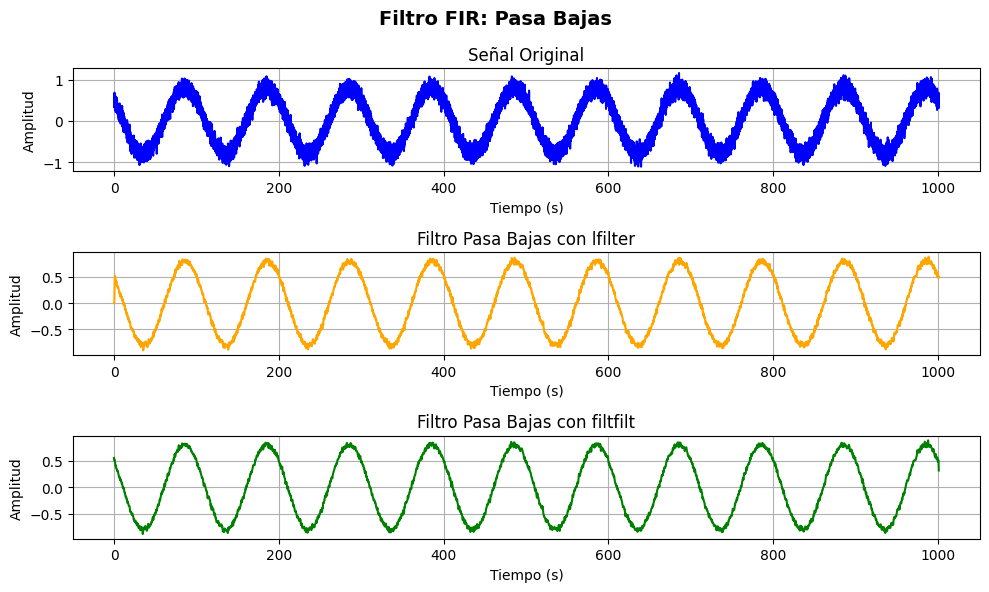

In [11]:
b_low = signal.firwin(order + 1, wn_low, window='hamming')
y_f_lfilter = signal.lfilter(b=b_low, a=1, x=y_e)  # Usando lfilter
y_f_filtfilt = signal.filtfilt(b=b_low, a=1, x=y_e)  # Usando filtfilt

plt.figure(figsize=(10, 6))
plt.suptitle("Filtro FIR: Pasa Bajas", fontsize=14,fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_e, color='blue')
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_lfilter, color='orange')
plt.title("Filtro Pasa Bajas con lfilter")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_filtfilt, color='green')
plt.title("Filtro Pasa Bajas con filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()


¿Por qué se usa solo el denominador?
R/ Ya que los filtros FIR pasa bajas solo se utiliza el numerador (b), debido a que su diseño solo requiere coeficientes para el numerador. Esto es porque en los filtros FIR, el denominador es 1 (a=1) porque no hay retroalimentación en el sistema, a diferencia de los filtros IIR.

¿A qué hace referencia el numerador?
R/ En los filtros FIR, el numerador hace referencia a los coeficientes del filtro que definen cómo se ponderan las muestras de la señal de entrada para obtener la señal de salida filtrada.

¿Evidencia cambios en el uso de las funciones de filtrado?
R/ Al observar la gráfica, se evidencia que hay una diferencia entre el resultado de lfilter y filtfilt. La función lfilter aplica el filtro de manera causal, lo que puede introducir un desfase en la señal filtrada, que en este caso no se evidencia ya que esto es deacuero al orden que use. En cambio, filtfilt aplica el filtro hacia adelante y luego hacia atrás, lo cual elimina este desfase.

¿Cómo se puede explicar la falta de coincidencia?
R/ La falta de coincidencia entre los resultados de lfilter y filtfilt se debe por este efecto de desfase en lfilter. En este caso, filtfilt es más adecuado cuando se requiere mantener la alineación de fase en la señal filtrada.

¿Es adecuado el orden del filtro usado?
R/ Si, ya que la señal filtrada conserva su forma sinusoidal y no presenta distorsión notable en ambas funciones de filtrado. Sin embargo, si se necesita una mayor suavización o eliminación de ruido, podría considerarse ajustar el orden o la frecuencia de corte.

* Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el
numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal
caso hágalo y analice.

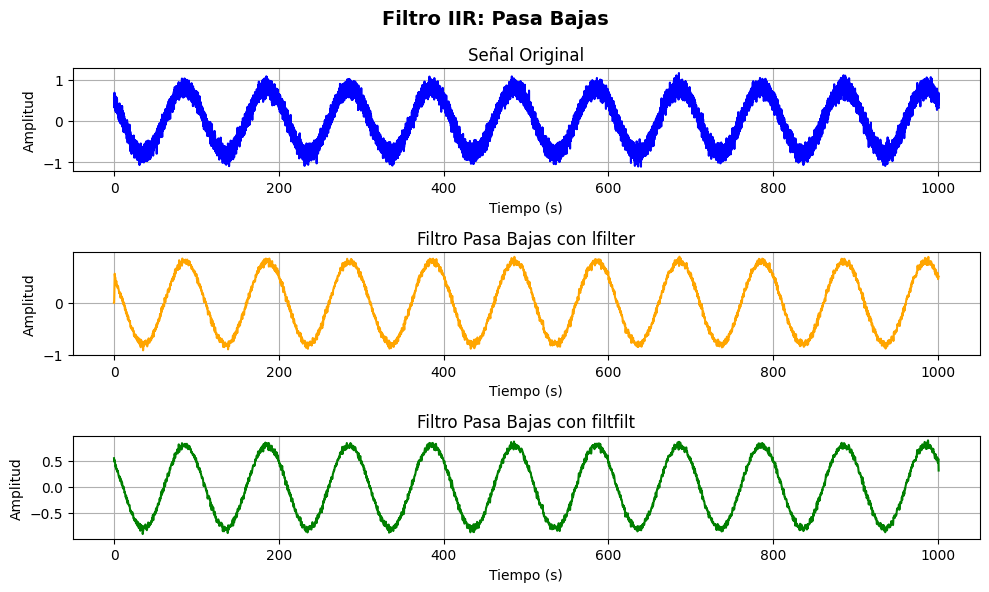

In [12]:
orden_irr = 5
b_low, a_low = signal.iirfilter(orden_iir, wn_low, btype='lowpass', ftype='butter')
y_f_lfilter = signal.lfilter(b=b_low,a=a_low,x=y_e)  # Usando lfilter
y_f_filtfilt = signal.filtfilt(b=b_low,a=a_low,x=y_e)  # Usando filtfilt

# Visualización de las señales filtradas
plt.figure(figsize=(10, 6))
plt.suptitle("Filtro IIR: Pasa Bajas", fontsize=14, fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_e, color='blue')
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_lfilter, color='orange')
plt.title("Filtro Pasa Bajas con lfilter")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_filtfilt, color='green')
plt.title("Filtro Pasa Bajas con filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

¿Por qué se utilizan el numerador y denominador?
En los filtros IIR, el numerador y el denominadorrepresentan los coeficientes del filtro en la función de transferencia, a diferencia de los filtros FIR que su denominador es 1. Segun los coeficientes del umerador y el denominador se definene el comportamiento del filtro, determinando qué frecuencias se atenúan o pasan. En este caso, al ser un filtro pasa bajas, los coeficientes están configurados para atenuar las frecuencias altas, permitiendo el paso de las bajas frecuencias.

 ¿Es necesario cambiar el orden?
 Como se evidencio en el punto 4.2 realizado anteriormente, un filtro IIR necesita un orden menor respecto al orden usado en el filtro FIR para dar las caracterisitcas deseadas al filtro. El orden del filtro que se slecciono con base a esto(5), determina la selectividad del filtro en la transición entre frecuencias pasantes y de rechazo. Un orden más alto puede hacer que el filtro sea más selectivo, pero también puede introducir distorsión de fase, como se evidencio en el punto 4.2. De este modo la seleccion del orden dependera de la atenuación en la banda de rechazo y las altas frecuencias que se desea.


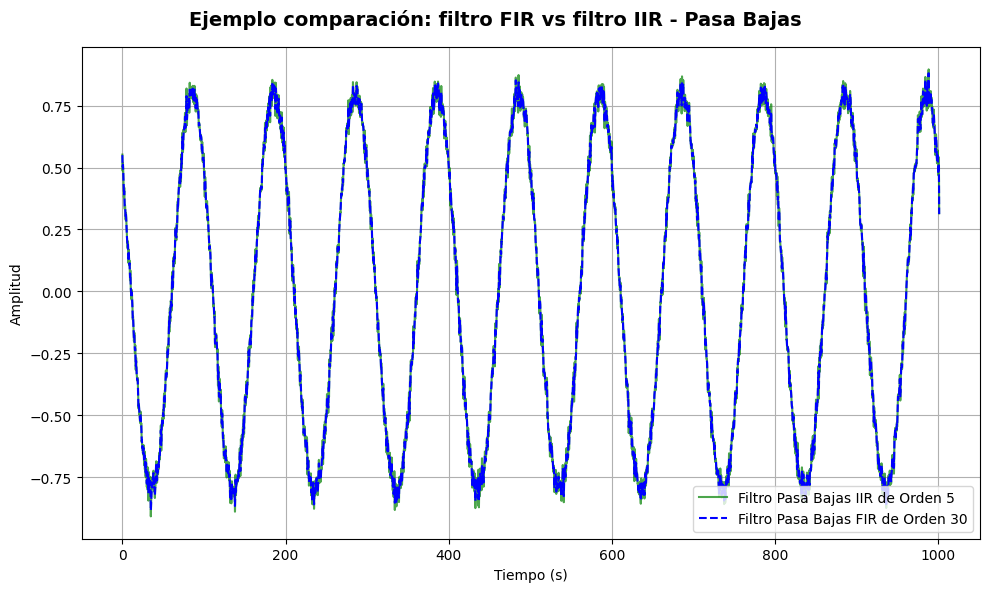

In [13]:
#Comparación de las señales

# Pasa bajas FIR
lowpassp = signal.firwin(order+1,wn_low, pass_zero = 'lowpass',window='hamming') #filtro
y_f_30p = signal.filtfilt(b=lowpassp,a=1,x=y_e) # aplicación del filtro

# Filtro pasa bajas IIR
orden_iirp = 5
b_lowp, a_lowp = signal.iirfilter(orden_iirp, wn_low, btype='lowpass')
y_f_lowp = signal.filtfilt(b=b_lowp,a=a_lowp,x=y_e)  # Aplicación del filtro

plt.figure(figsize=(10, 6))
plt.suptitle("Ejemplo comparación: filtro FIR vs filtro IIR - Pasa Bajas", fontsize=14,fontweight='bold')

plt.plot(n, y_f_lowp, color='green', alpha=0.7,label="Filtro Pasa Bajas IIR de Orden 5")
plt.plot(n, y_f_30p, color='blue', linestyle='--', label="Filtro Pasa Bajas FIR de Orden 30")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## **4.4 Aplicación**

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.  

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


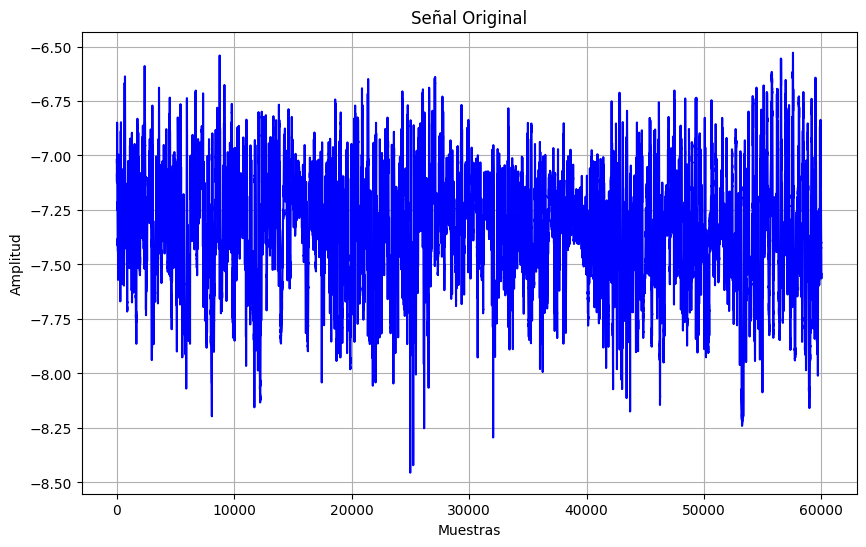

In [ ]:
# Carga del archivo de datos
data = np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/senal_filtros.txt')

# Se toma el canal 1
canal_1 = data[:, 0]

# Visualización de la señal
plt.figure(figsize=(10, 6))
plt.plot(canal_1, color='blue')
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Muestras")
plt.grid()
plt.show()

* Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

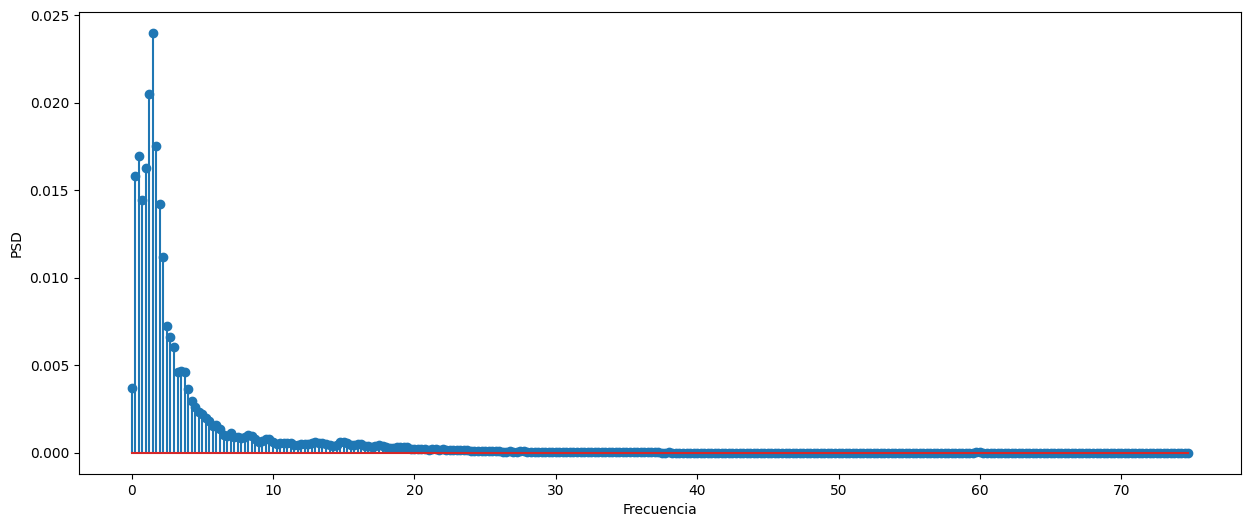

In [ ]:
from scipy.signal import welch
from scipy.signal.windows import hann

fs = 500 # Frecuencia de muestreo
window_size = 2000 # Tamaño de la ventana de 1000 muestras
overlap = window_size // 2  # Solapamiento del 50%
window = hann(window_size)

#Periodograma de Welch
frequiencies, power_spectrum = welch(canal_1, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

plt.figure(figsize=(15,6))
plt.stem(abs(frequiencies[0:300]), power_spectrum[0:300])
plt.xlabel('Frecuencia')
plt.ylabel('PSD')
plt.show()

En el periodograma de Welch, se observa una alta densidad espectral de potencia en las frecuencias bajas, las cuales corresponden a la senal original, que presenta componentes de baja frecuencia. Esto indica que la mayor parte de la energía de la señal se concentra en estas frecuencias.

Sin embargo, se puede notar la presencia de algunos picos en el espectro, especialmente en la región de los 60 Hz. Este pico, aunque muy pequeño, es indicativo de una posible interferencia de ruido eléctrico, probablemente debido a la frecuencia de la red eléctrica (60 Hz). Además, algunos otros picos menores aparecen en el rango superior a 25 Hz, aunque son de menor magnitud. Estos picos adicionales podrían deberse a otras fuentes de ruido o artefactos en la señal.

* Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch  de la señal filtrada) ¿Hay cambios? Analice.

Observando el periodograma de Welch, se identifica que la mayor concentración de energía se encuentra en frecuencias bajas, principalmente entre 0 y 15 Hz. Dado que los componentes de alta frecuencia no son relevantes para el análisis y para minimizar la interferencia de ruido, se opta por aplicar un filtro pasa bajas.

El filtro se diseña con una frecuencia de corte de 40 Hz y una banda de transición de 10 Hz, de modo que se logre una atenuación significativa a partir de los 50 Hz. Esto garantiza una reducción efectiva de cualquier interferencia de alta frecuencia, incluyendo la componente de 60 Hz, asociada a la red eléctrica. De esta manera, el filtro permite conservar los componentes principales de la señal mientras suprime el ruido de alta frecuencia y posibles artefactos indeseados.

In [ ]:
# Se realiza el diseño del filtro

# Parámetros del filtro
order = int(3.3/(10/500))
# order = 30
nyquist = fs/2  # Frecuencia de Nyquist
wn_low = 40/nyquist  # Frecuencia de corte normalizada respecto a Nyquist
low_pass = signal.firwin(order+1, wn_low, window='hamming')

canal_1_filt = signal.filtfilt(b=low_pass, a=1, x=canal_1)  # Aplicación del filtro con filtfilt
canal_1_lfilter = signal.lfilter(b=low_pass, a=1, x=canal_1)  # Aplicación del filtro con lfilter


Ahora se obtiene nuevamente el Periodograma de Welch para la senal filtrada, tanto con filtfilt, como con lfilter.

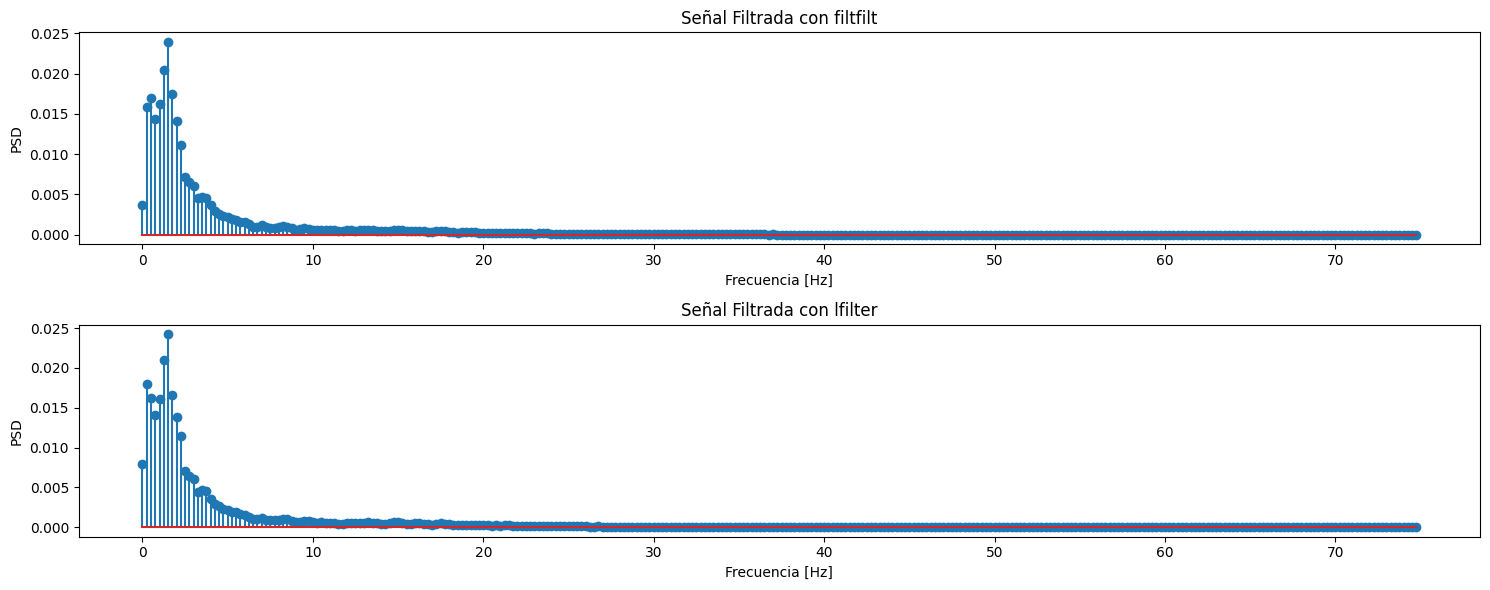

In [ ]:

f_filt, pxx_filt = welch(canal_1_filt, fs=fs, window=window, nperseg=window_size, noverlap=overlap)
f_lfilter, pxx_lfilter = welch(canal_1_lfilter, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Visualización de los periodogramas
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.stem(abs(f_filt[0:300]), pxx_filt[0:300])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.title('Señal Filtrada con filtfilt')

plt.subplot(2, 1, 2)
plt.stem(abs(f_lfilter[0:300]), pxx_lfilter[0:300])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.title('Señal Filtrada con lfilter')

plt.tight_layout()
plt.show()

Para evaluar la efectividad del filtro pasa bajas diseñado, se aplicaron dos métodos de filtrado: filtfilt y lfilter. El método filtfilt realiza un filtrado hacia adelante y hacia atrás, lo que evita el desplazamiento de fase al aplicar el filtro de manera simétrica, mientras que lfilter aplica el filtro en una sola dirección, lo que puede introducir un pequeño desfase en la señal.

En los periodogramas de Welch de ambas señales filtradas, se observa una notable reducción de las componentes de frecuencia superiores a 40 Hz, especialmente en los picos asociados a la interferencia de 60 Hz y otras frecuencias altas. Esto indica que el filtro ha sido efectivo en la eliminación de ruido de alta frecuencia y ha conservado las características principales de la señal dentro del rango de interés.

* Grafique un segmento de las señales antes y después de filtrar, analice los
cambios.

Con `filtfilt`

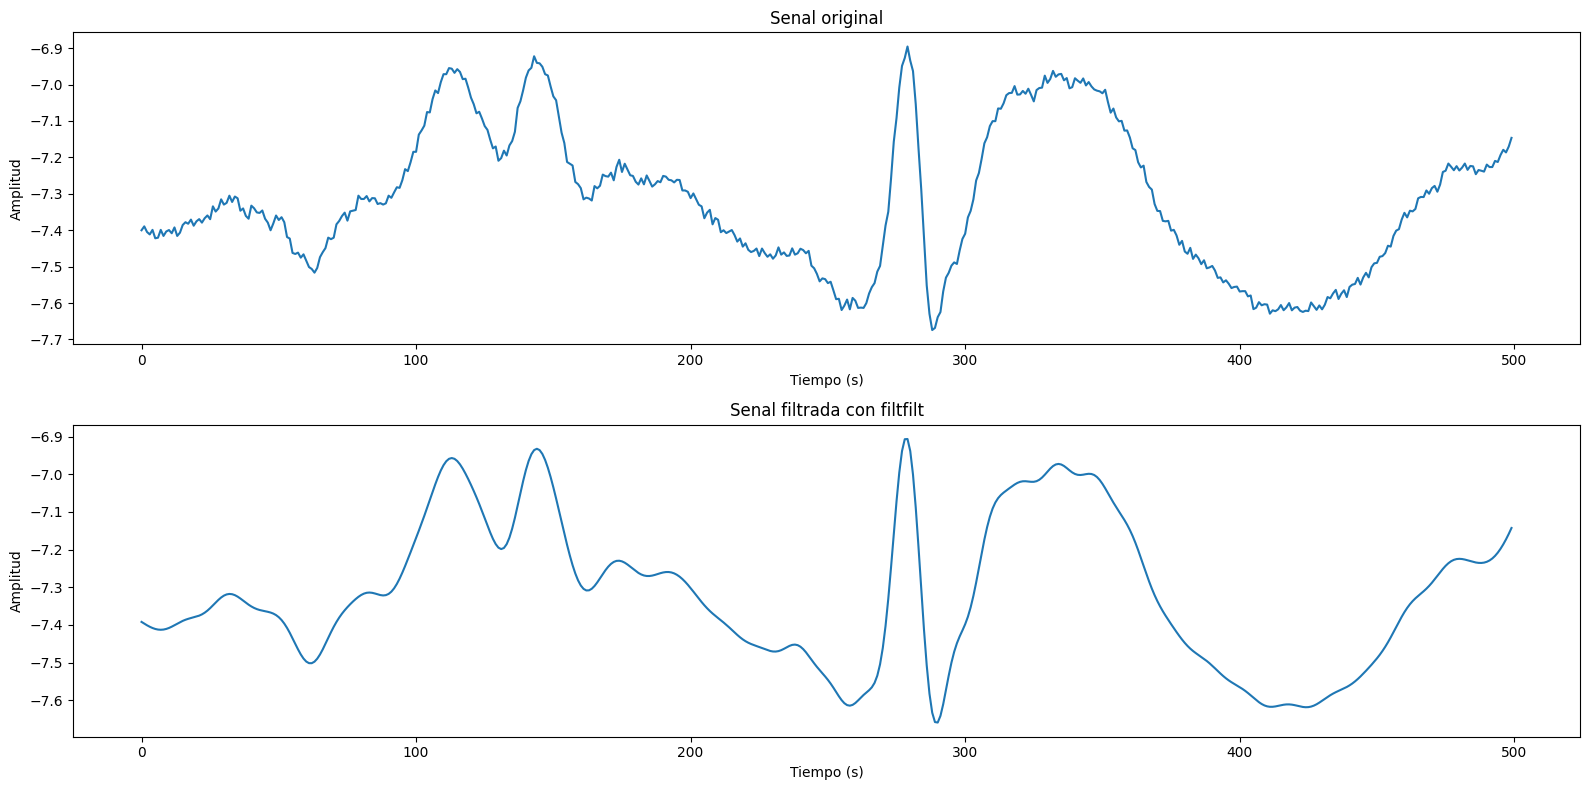

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.plot(canal_1[1000:1500])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal original')

plt.subplot(2,1,2)
plt.plot(canal_1_filt[1000:1500])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal filtrada con filtfilt')

plt.tight_layout()
plt.show()

Se visualizan las senales en ambos un mismo grafico

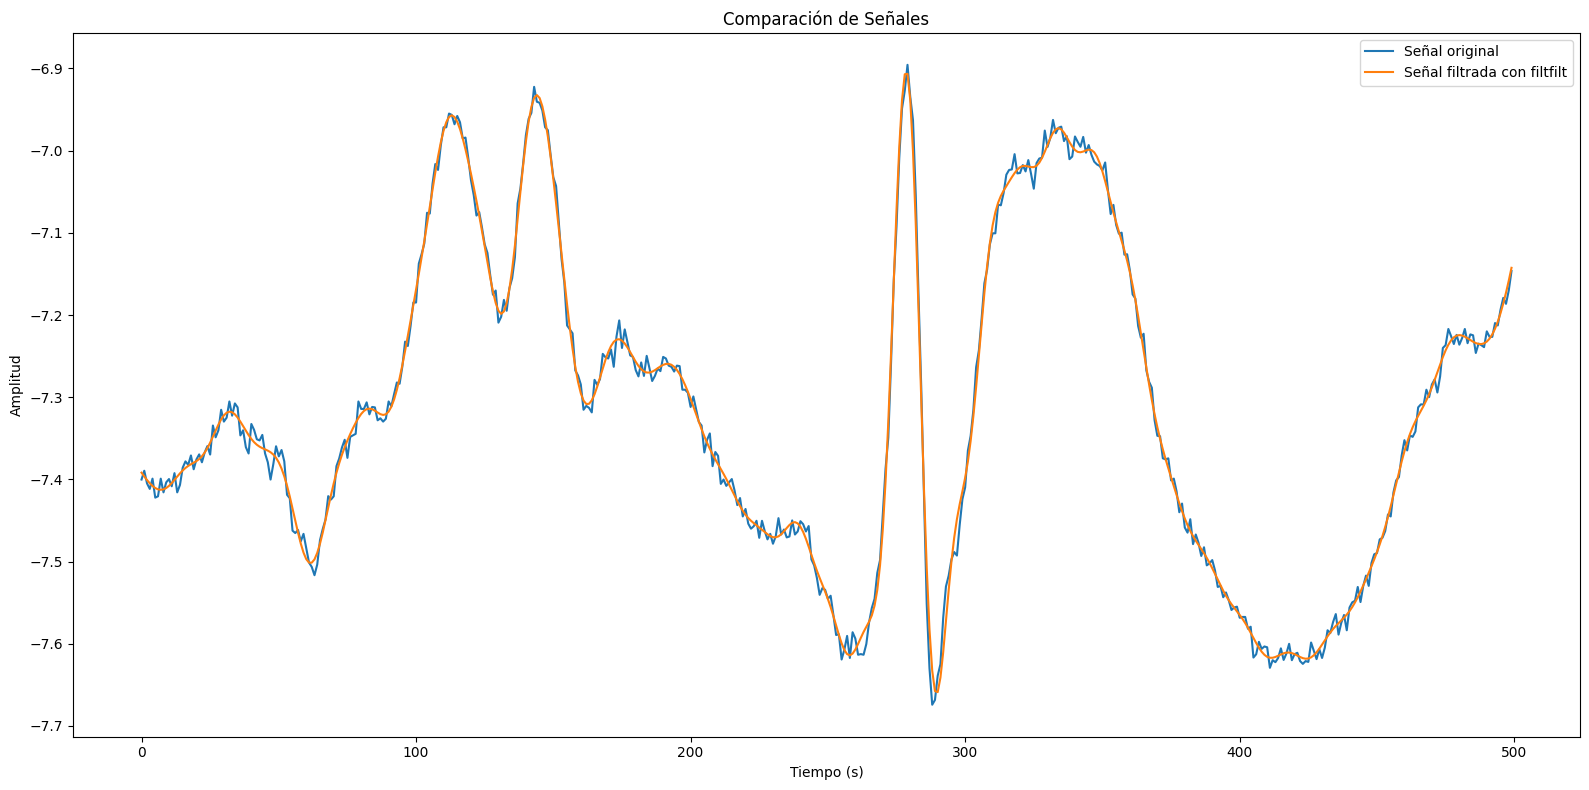

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(canal_1[1000:1500], label='Señal original')
plt.plot(canal_1_filt[1000:1500], label='Señal filtrada con filtfilt')

plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Comparación de Señales')
plt.legend()

plt.tight_layout()
plt.show()

Con `lfilter`

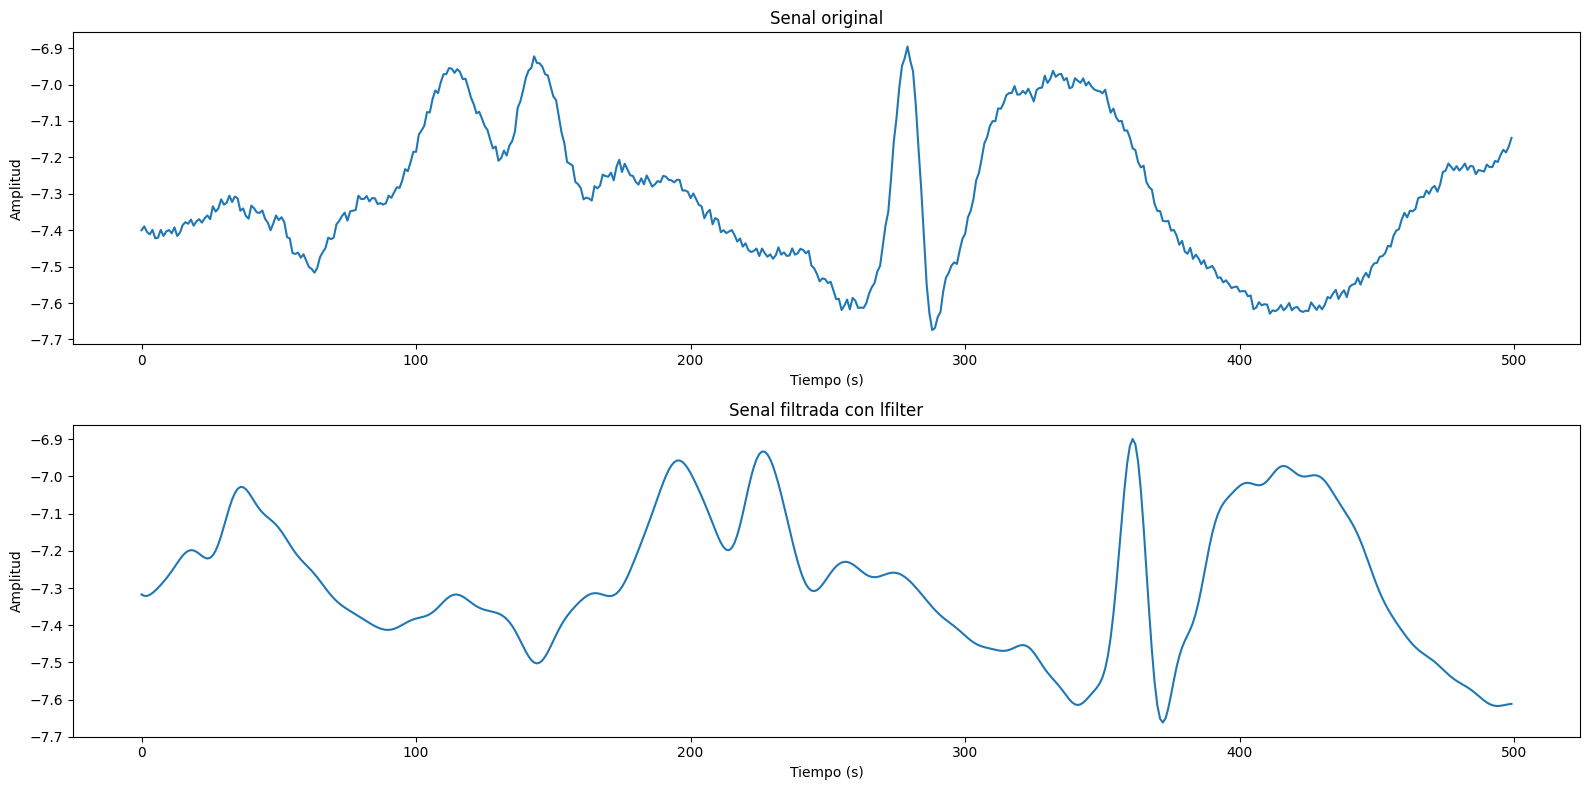

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.plot(canal_1[1000:1500])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal original')

plt.subplot(2,1,2)
plt.plot(canal_1_lfilter[1000:1500])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal filtrada con lfilter')

plt.tight_layout()
plt.show()

Ahora se visualizan en un mismo grafico

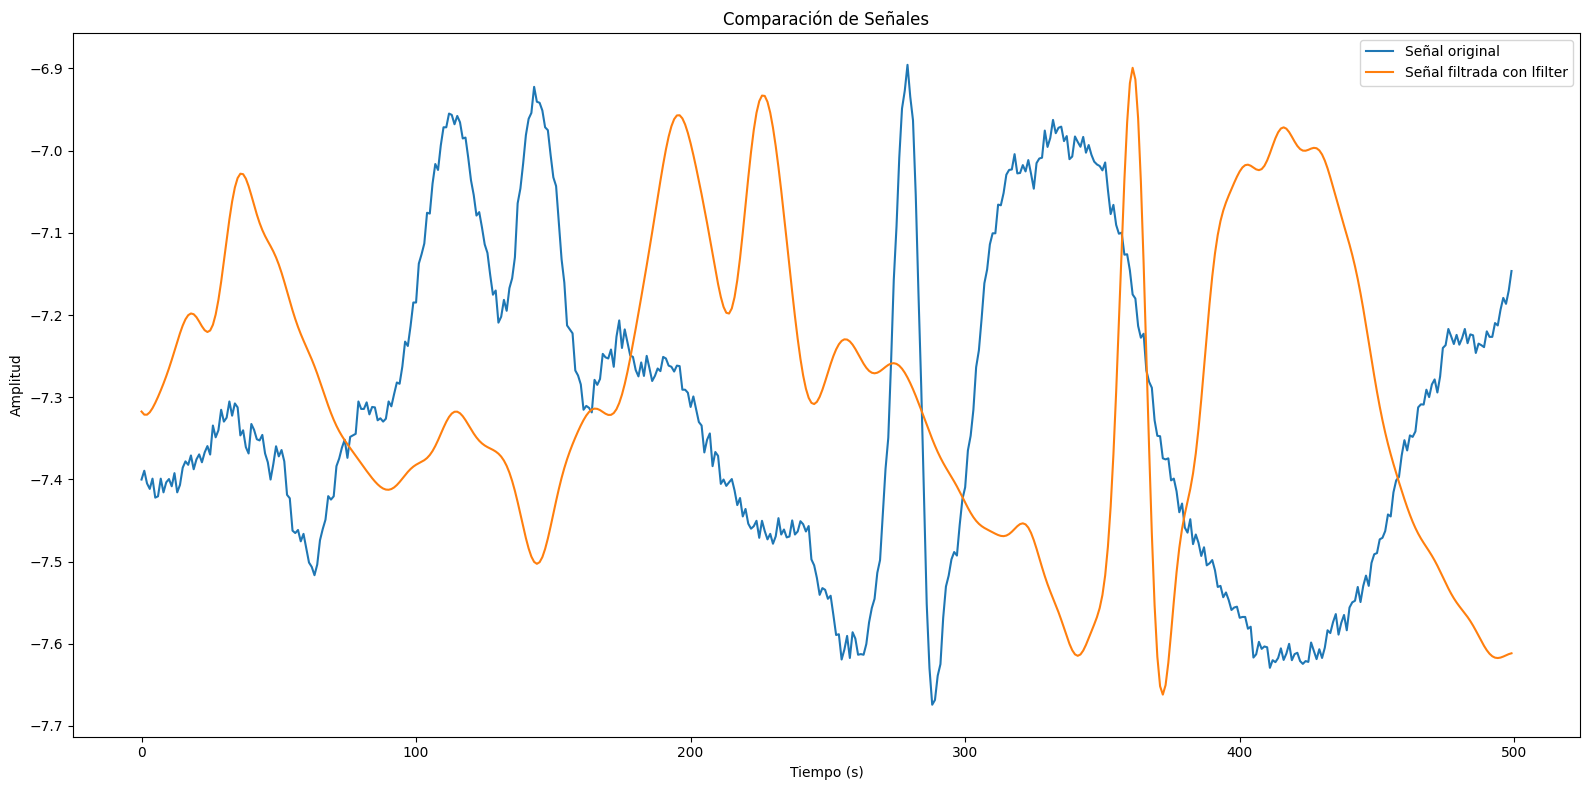

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(canal_1[1000:1500], label='Señal original')
plt.plot(canal_1_lfilter[1000:1500], label='Señal filtrada con lfilter')

plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Comparación de Señales')
plt.legend()

plt.tight_layout()
plt.show()

Para analizar el efecto del filtrado en la señal original, se procedió a comparar visualmente segmentos de la señal antes y después de aplicar los métodos de filtrado filtfilt y lfilter. En las dos primeras figuras, se observa la señal original junto a la señal filtrada utilizando filtfilt. En este caso, filtfilt, que aplica el filtro en ambas direcciones, logra mantener la alineación en fase de la señal, es decir, no introduce ningún desfase entre la señal original y la filtrada [1]. Este comportamiento es termina siendo importante cuando se desea conservar la forma temporal de la señal sin distorsiones de fase, lo cual es fundamental en muchos análisis de señal.

En contraste, las dos últimas figuras muestran la señal original comparada con la señal filtrada utilizando lfilter. A diferencia de filtfilt, lfilter aplica el filtro en una sola dirección, lo que resulta en un ligero desfase de la señal filtrada respecto a la original. Este desplazamiento de fase es una consecuencia del filtrado en una sola dirección y puede ser notable en ciertos puntos de la señal [2]. Aunque lfilter es eficiente y adecuado en muchos contextos, el desfase introducido puede ser una limitación si la alineación temporal es un factor crítico en el análisis.

Dado que la naturaleza de la señal filtrada no es completamente conocida, no es posible afirmar categóricamente cuál de los dos métodos, filtfilt o lfilter, es superior para este caso específico. Sin embargo, ambos métodos cumplen eficazmente con el objetivo inicial: obtener una señal sin ruido y sin interferencias de alta frecuencia.


## **Conclusiones**

A lo largo del análisis y procesamiento de la señal, se implementó un filtro pasa bajas con una frecuencia de corte de 40 Hz, logrando una reducción efectiva del ruido y la eliminación de interferencias de alta frecuencia, particularmente aquellas asociadas a los 60 Hz de la red eléctrica. Este filtrado permitió obtener una señal más limpia y enfocada en el rango de frecuencias relevante para el análisis.

Para evaluar el efecto del filtrado, se compararon dos métodos distintos: filtfilt y lfilter. Ambos lograron reducir las componentes de alta frecuencia y mejorar la claridad de la señal, aunque con una diferencia clave en la preservación de la fase. Filtfilt, al aplicar el filtrado en ambas direcciones, mantuvo la alineación temporal de la señal sin introducir desfase alguno, mientras que lfilter, al filtrar en una sola dirección, generó un ligero desfase en la señal filtrada. Esta diferencia es relevante cuando se requiere una representación fiel en tiempo de la señal, aunque en este caso, ambos métodos cumplieron adecuadamente con la tarea de limpieza de la señal.

Dado que la naturaleza exacta de la señal no se conoce con certeza, no se puede determinar cuál de los dos métodos es superior en este contexto particular. No obstante, ambos proporcionaron una señal filtrada libre de ruido de alta frecuencia, cumpliendo el propósito inicial del análisis. La elección entre filtfilt y lfilter en futuras aplicaciones dependerá de las necesidades específicas de preservación de fase, ya que ambos métodos son válidos para lograr la atenuación deseada.

## **Referencias**

[1] SciPy Developers. "scipy.signal.filtfilt." SciPy Reference Guide, 20 Oct. 2024, https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html.

[2] SciPy Developers. "scipy.signal.lfilter." SciPy Reference Guide, 20 Oct. 2024, https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html.

[3] Filtro, ¿qué es un, Bien, P., De las señales, un F. es un (s/f). 1.1. FUNDAMENTOS TEÓRICOS: FILTROS. Biblus.us.es. Recuperado el 31 de octubre de 2024, de https://biblus.us.es/bibing/proyectos/abreproy/11375/fichero/MEMORIA%252FFundamentos+teoricos.pdf

[4] Filtros digitales - FIR. (s/f). Edu.ar. Recuperado el 31 de octubre de 2024, de https://www3.fi.mdp.edu.ar/tds/material/10-Filtros%20FIR.pdf

[5] Cuevas-Jiménez, E., & Oliva-Navarro, D. A. (2013). Modelado de filtros IIR usando un algoritmo inspirado en el electromagnetismo. Ingeniería Investigación y Tecnología, 14(1), 125–138. https://doi.org/10.1016/S1405-7743(13)72231-5

[6] Paz, M. E., & Rodriguez, O. A. (s/f). Trabajo de Cátedra: Uso de la placa Discovery para el cálculo e implementación de filtros FIR e IIR. Edu.ar. Recuperado el 31 de octubre de 2024, de https://sedici.unlp.edu.ar/bitstream/handle/10915/58186/Documento_completo.pdf-PDFA.pdf?sequence=1&isAllowed=y

[7] Al impulso infinita, E. E. Q. C. del L. A. el D. de F. de R., & De filtros análogos y aplicando mapeo entre, a. P. del D. (s/f). Metodos de diseño de filtros IIR. Redipe.org. Recuperado el 31 de octubre de 2024, de https://editorial.redipe.org/index.php/1/catalog/download/129/229/4655?inline=1


